In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import RMSprop, Adadelta, Adam

Using TensorFlow backend.


<Figure size 432x288 with 0 Axes>

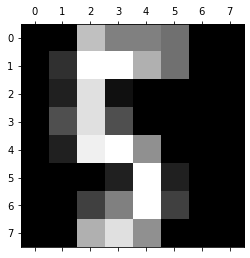

In [3]:
dig = load_digits()
plt.gray()
plt.matshow(dig.images[25])

In [14]:
onehot_target = pd.get_dummies(dig.target)

In [15]:
x_train, x_val, y_train, y_val = train_test_split(dig.data, onehot_target, test_size=0.1, random_state=20)

In [16]:
model = Sequential()

In [17]:
model.add(Dense(128, input_dim=x_train.shape[1], activation='sigmoid'))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 26,122
Trainable params: 26,122
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(optimizer=Adadelta(), loss='categorical_crossentropy', metrics=['categorical_accuracy'])
model.fit(x_train, y_train, epochs=50, batch_size=64)

scores = model.evaluate(x_val, y_val)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/50
1617/1617 [==============================] - 0s 82us/step - loss: 2.0448 - categorical_accuracy: 0.4731
Epoch 2/50
1617/1617 [==============================] - 0s 20us/step - loss: 1.4066 - categorical_accuracy: 0.8200
Epoch 3/50
1617/1617 [==============================] - 0s 20us/step - loss: 0.9431 - categorical_accuracy: 0.8868
Epoch 4/50
1617/1617 [==============================] - 0s 17us/step - loss: 0.6549 - categorical_accuracy: 0.9264
Epoch 5/50
1617/1617 [==============================] - 0s 15us/step - loss: 0.4726 - categorical_accuracy: 0.9481
Epoch 6/50
1617/1617 [==============================] - 0s 16us/step - loss: 0.3592 - categorical_accuracy: 0.9629
Epoch 7/50
1617/1617 [==============================] - 0s 15us/step - loss: 0.2814 - categorical_accuracy: 0.9703
Epoch 8/50
1617/1617 [==============================] - 0s 15us/step - loss: 0.2326 - categorical_accuracy: 0.9740
Epoch 9/50
1617/1617 [==============================] - 0s 15us/step - loss: 0.1